In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('my_dataset.csv', sep=',')
df

,Zaman damgası,Cinsiyet,Yaş,Açık sözlülük,Sorumluluk sahibi,Duygusal dengesizlik,Dürüstlük,Uyumluluk,Dışadönüklük,Düzenlilik,Sabırlılık,Burç element grubunuz:,Hangisi sizi daha iyi tanımlar?
0,08.05.2022 21:27:26,Kadın,22,4,6,2,6,5,5,6,6,"Toprak: (oğlak, boğa, başak)",Sorumlu
1,08.05.2022 21:31:53,Erkek,23,5,5,3,6,6,5,4,4,"Ateş: (koç, aslan, yay)",Güvenilir
2,08.05.2022 21:34:48,Erkek,25,6,4,4,5,6,6,3,3,"Hava: (terazi, kova, ikizler)",Hayat dolu
3,08.05.2022 21:37:02,Kadın,21,4,6,2,5,6,5,4,3,"Su: (akrep, yengeç, balık)",Dışadönük
4,08.05.2022 21:40:40,Kadın,21,4,5,6,5,6,5,5,4,"Toprak: (oğlak, boğa, başak)",Ciddi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,22.05.2022 18:00:09,Kadın,28,3,6,1,6,6,6,6,2,"Toprak: (oğlak, boğa, başak)",Güvenilir
267,22.05.2022 18:33:19,Kadın,23,4,5,2,6,6,1,5,4,"Su: (akrep, yengeç, balık)",Sorumlu
268,22.05.2022 18:35:51,Kadın,17,3,4,5,6,5,4,3,4,"Toprak: (oğlak, boğa, başak)",Hayat dolu
269,23.05.2022 00:01:00,Kadın,27,3,5,1,6,6,3,4,5,"Hava: (terazi, kova, ikizler)",Güvenilir


In [12]:
# Zaman bilgisi önemli olmadığı için atılır
df.drop("Zaman damgası", axis=1, inplace=True)
df.head()

,Cinsiyet,Yaş,Açık sözlülük,Sorumluluk sahibi,Duygusal dengesizlik,Dürüstlük,Uyumluluk,Dışadönüklük,Düzenlilik,Sabırlılık,Burç element grubunuz:,Hangisi sizi daha iyi tanımlar?
0,Kadın,22,4,6,2,6,5,5,6,6,"Toprak: (oğlak, boğa, başak)",Sorumlu
1,Erkek,23,5,5,3,6,6,5,4,4,"Ateş: (koç, aslan, yay)",Güvenilir
2,Erkek,25,6,4,4,5,6,6,3,3,"Hava: (terazi, kova, ikizler)",Hayat dolu
3,Kadın,21,4,6,2,5,6,5,4,3,"Su: (akrep, yengeç, balık)",Dışadönük
4,Kadın,21,4,5,6,5,6,5,5,4,"Toprak: (oğlak, boğa, başak)",Ciddi


In [13]:
# sütun isimleri kolaylık olması açısından tek kelime ve ingilizceye dönüştürülür
df.columns = ['gender', 'age', 'openness', 'responsibility',
              'neuroticism', 'honesty', 'compatibility', 'extraversion',
              'regularity', 'patience', 'element', 'personality']
df.head()

,gender,age,openness,responsibility,neuroticism,honesty,compatibility,extraversion,regularity,patience,element,personality
0,Kadın,22,4,6,2,6,5,5,6,6,"Toprak: (oğlak, boğa, başak)",Sorumlu
1,Erkek,23,5,5,3,6,6,5,4,4,"Ateş: (koç, aslan, yay)",Güvenilir
2,Erkek,25,6,4,4,5,6,6,3,3,"Hava: (terazi, kova, ikizler)",Hayat dolu
3,Kadın,21,4,6,2,5,6,5,4,3,"Su: (akrep, yengeç, balık)",Dışadönük
4,Kadın,21,4,5,6,5,6,5,5,4,"Toprak: (oğlak, boğa, başak)",Ciddi


In [22]:
# string tipindeki özellikler için 'int' dönüşümü gerçekleştirilir 
le = LabelEncoder()
df.gender = le.fit_transform(df.gender)
df.element = le.fit_transform(df.element)
df.personality = le.fit_transform(df.personality)

In [35]:
df.head()

,gender,age,openness,responsibility,neuroticism,honesty,compatibility,extraversion,regularity,patience,element,personality
0,1,22,4,6,2,6,5,5,6,6,3,4
1,0,23,5,5,3,6,6,5,4,4,0,2
2,0,25,6,4,4,5,6,6,3,3,1,3
3,1,21,4,6,2,5,6,5,4,3,2,1
4,1,21,4,5,6,5,6,5,5,4,3,0


In [31]:
p = ['ciddi', 'dışadönük', 'güvenilir', 'hayat dolu', 'sorumlu']
e = ['ateş', 'hava', 'su', 'toprak']

freqs = {}

for i in np.unique(df['personality']): #0-1-2-3-4
    col = df[df['personality'] == i]['element']
    freq = [col.value_counts()[i] for i in np.unique(col)]
    freqs[p[i]] = freq

In [32]:
# Kişilik tipleri içerisindeki burç grup dağılımı:

data = [[list(freqs)[0], freqs[(list(freqs)[0])]], 
        [list(freqs)[1], freqs[(list(freqs)[1])]],
        [list(freqs)[2], freqs[(list(freqs)[2])]], 
        [list(freqs)[3], freqs[(list(freqs)[3])]],
        [list(freqs)[4], freqs[(list(freqs)[4])]]]

print(tabulate(data, headers=['personality', 'element'], tablefmt="fancy_grid"))

╒═══════════════╤══════════════════╕
│ personality   │ element          │
╞═══════════════╪══════════════════╡
│ ciddi         │ [6, 7, 5, 13]    │
├───────────────┼──────────────────┤
│ dışadönük     │ [1, 6, 11, 3]    │
├───────────────┼──────────────────┤
│ güvenilir     │ [54, 27, 33, 30] │
├───────────────┼──────────────────┤
│ hayat dolu    │ [5, 18, 10, 5]   │
├───────────────┼──────────────────┤
│ sorumlu       │ [2, 8, 10, 17]   │
╘═══════════════╧══════════════════╛


In [77]:
# ör: dışadönükler genelde balık, akrep, yengeç burçlarındadır. (su grubu)
data = [[list(freqs)[0], e[freqs[list(freqs)[0]].index(max(freqs[(list(freqs)[0])]))]], 
        [list(freqs)[1], e[freqs[list(freqs)[1]].index(max(freqs[(list(freqs)[1])]))]], 
        [list(freqs)[2], e[freqs[list(freqs)[2]].index(max(freqs[(list(freqs)[2])]))]], 
        [list(freqs)[3], e[freqs[list(freqs)[3]].index(max(freqs[(list(freqs)[3])]))]],
        [list(freqs)[4], e[freqs[list(freqs)[4]].index(max(freqs[(list(freqs)[4])]))]]]

print(tabulate(data, headers=['personality', 'element'], tablefmt="fancy_grid"))

╒═══════════════╤═══════════╕
│ personality   │ element   │
╞═══════════════╪═══════════╡
│ ciddi         │ toprak    │
├───────────────┼───────────┤
│ dışadönük     │ su        │
├───────────────┼───────────┤
│ güvenilir     │ ateş      │
├───────────────┼───────────┤
│ hayat dolu    │ hava      │
├───────────────┼───────────┤
│ sorumlu       │ toprak    │
╘═══════════════╧═══════════╛


In [55]:
# 0-> ciddi
# 1-> dışadönük
# 2-> güvenilir
# 3-> hayat dolu
# 4-> sorumlu

# openness
openness_0 = df[df['personality']==0]['openness'].mean()
openness_1 = df[df['personality']==1]['openness'].mean()
openness_2 = df[df['personality']==2]['openness'].mean()
openness_3 = df[df['personality']==3]['openness'].mean()
openness_4 = df[df['personality']==4]['openness'].mean()

# responsibility
responsibility_0 = df[df['personality']==0]['responsibility'].mean()
responsibility_1 = df[df['personality']==1]['responsibility'].mean()
responsibility_2 = df[df['personality']==2]['responsibility'].mean()
responsibility_3 = df[df['personality']==3]['responsibility'].mean()
responsibility_4 = df[df['personality']==4]['responsibility'].mean()

# neuroticism
neuroticism_0 = df[df['personality']==0]['neuroticism'].mean()
neuroticism_1 = df[df['personality']==1]['neuroticism'].mean()
neuroticism_2 = df[df['personality']==2]['neuroticism'].mean()
neuroticism_3 = df[df['personality']==3]['neuroticism'].mean()
neuroticism_4 = df[df['personality']==4]['neuroticism'].mean()

# honesty
honesty_0 = df[df['personality']==0]['honesty'].mean()
honesty_1 = df[df['personality']==1]['honesty'].mean()
honesty_2 = df[df['personality']==2]['honesty'].mean()
honesty_3 = df[df['personality']==3]['honesty'].mean()
honesty_4 = df[df['personality']==4]['honesty'].mean()

# compatibility
compatibility_0 = df[df['personality']==0]['compatibility'].mean()
compatibility_1 = df[df['personality']==1]['compatibility'].mean()
compatibility_2 = df[df['personality']==2]['compatibility'].mean()
compatibility_3 = df[df['personality']==3]['compatibility'].mean()
compatibility_4 = df[df['personality']==4]['compatibility'].mean()

# extraversion
extraversion_0 = df[df['personality']==0]['extraversion'].mean()
extraversion_1 = df[df['personality']==1]['extraversion'].mean()
extraversion_2 = df[df['personality']==2]['extraversion'].mean()
extraversion_3 = df[df['personality']==3]['extraversion'].mean()
extraversion_4 = df[df['personality']==4]['extraversion'].mean()

# regularity
regularity_0 = df[df['personality']==0]['regularity'].mean()
regularity_1 = df[df['personality']==1]['regularity'].mean()
regularity_2 = df[df['personality']==2]['regularity'].mean()
regularity_3 = df[df['personality']==3]['regularity'].mean()
regularity_4 = df[df['personality']==4]['regularity'].mean()

# patience
patience_0 = df[df['personality']==0]['patience'].mean()
patience_1 = df[df['personality']==1]['patience'].mean()
patience_2 = df[df['personality']==2]['patience'].mean()
patience_3 = df[df['personality']==3]['patience'].mean()
patience_4 = df[df['personality']==4]['patience'].mean()


sample = {'openness': [openness_0, openness_1, openness_2, openness_3, openness_4],
         'responsibility': [responsibility_0, responsibility_1, responsibility_2, responsibility_3, responsibility_4],
         'neuroticism': [neuroticism_0, neuroticism_1, neuroticism_2, neuroticism_3, neuroticism_4],
         'honesty': [honesty_0, honesty_1, honesty_2, honesty_3, honesty_4],
         'compatibility': [compatibility_0, compatibility_1, compatibility_2, compatibility_3, compatibility_4],
         'extraversion': [extraversion_0, extraversion_1, extraversion_2, extraversion_3, extraversion_4],
         'personality': ['ciddi', 'dışadönük', 'güvenilir', 'hayat dolu', 'sorumlu']}
sample = pd.DataFrame(sample)
sample

,openness,responsibility,neuroticism,honesty,compatibility,extraversion,personality
0,4.580645,4.741935,4.000000,4.838710,4.741935,3.870968,ciddi
1,4.285714,4.761905,3.857143,4.809524,5.142857,5.428571,dışadönük
2,4.333333,4.791667,3.680556,5.291667,4.979167,3.875000,güvenilir
3,4.684211,4.947368,3.736842,5.157895,5.421053,4.973684,hayat dolu
4,4.432432,5.729730,3.702703,5.108108,5.081081,4.243243,sorumlu


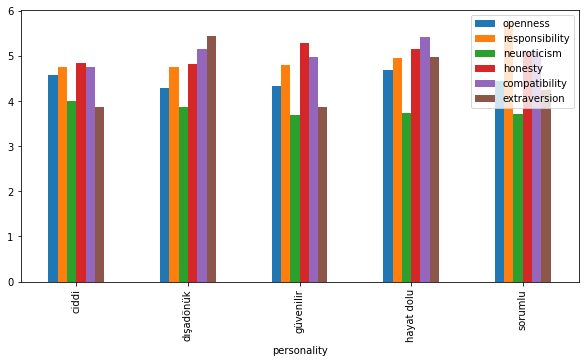

In [57]:
sample.plot(x="personality", y=sample.columns[:-1].to_list(), 
            kind="bar", figsize=(10, 5))
plt.show()

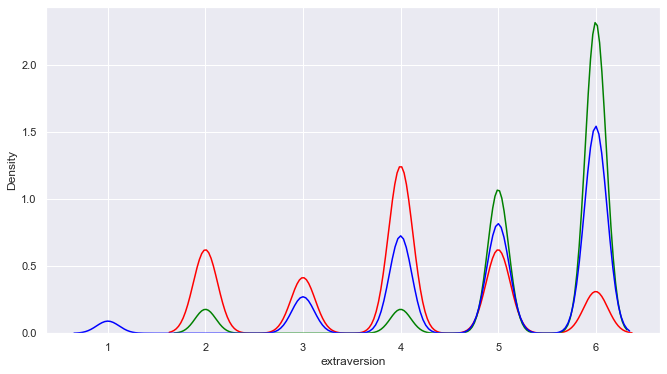

In [75]:
sns.set(rc = {'figure.figsize':(11,6)})
 
fig = sns.kdeplot(data=df[df['personality']==0]['extraversion'], shade=False, color="red", bw_adjust=.2)
fig = sns.kdeplot(data=df[df['personality']==1]['extraversion'], shade=False, color="green", bw_adjust=.2)
fig = sns.kdeplot(data=df[df['personality']==3]['extraversion'], shade=False, color="blue", bw_adjust=.2)

plt.show()

# red-> ciddi
# green-> dışadönük
# blue-> hayat dolu

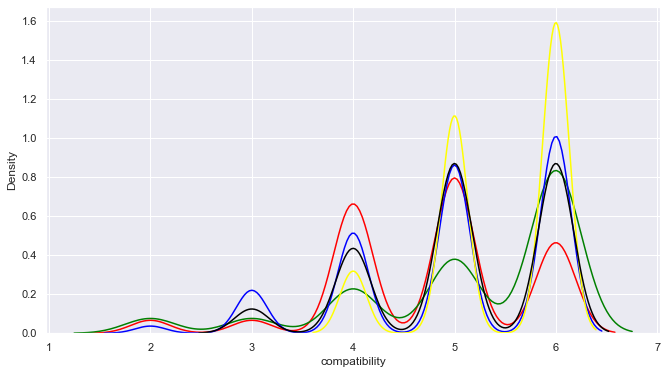

In [74]:
sns.set(rc = {'figure.figsize':(11,6)})
 
fig = sns.kdeplot(data=df[df['personality']==0]['compatibility'], shade=False, color="red", bw_adjust=.4)
fig = sns.kdeplot(data=df[df['personality']==1]['compatibility'], shade=False, color="green", bw_adjust=.4)
fig = sns.kdeplot(data=df[df['personality']==2]['compatibility'], shade=False, color="blue", bw_adjust=.4)
fig = sns.kdeplot(data=df[df['personality']==3]['compatibility'], shade=False, color="yellow", bw_adjust=.4)
fig = sns.kdeplot(data=df[df['personality']==4]['compatibility'], shade=False, color="black", bw_adjust=.4)

plt.show()

# red-> ciddi
# green-> dışadönük
# blue-> güvenilir
# yellow-> hayat dolu
# black-> sorumlu

In [29]:
df.to_csv('preprocessed_data.csv', sep='\t')